# <5주차 MLstudy 강의정리 및 코드실습>

## Lab 08 딥러닝의 기본 개념 (시작과 XOR문제)

뉴런을 컴퓨터로 만든다 --> 중요한 logic XOR등장 (XOR은 서로 다를 때 1을 준다.)

1974 back propagation 이라는 알고리즘 개발을 통해 XOR이 가능해짐 but 큰 layer에서는 잘 작동하지 못함

Convolutional Neural Networks CNN 합성곱 신경망 (ex: 그림을 여러개로 잘라서 나중에 합치는 방식) --> 초기값과 깊은 신경망이 필요

In [11]:
!pip install IPython 
from IPython.display import Image

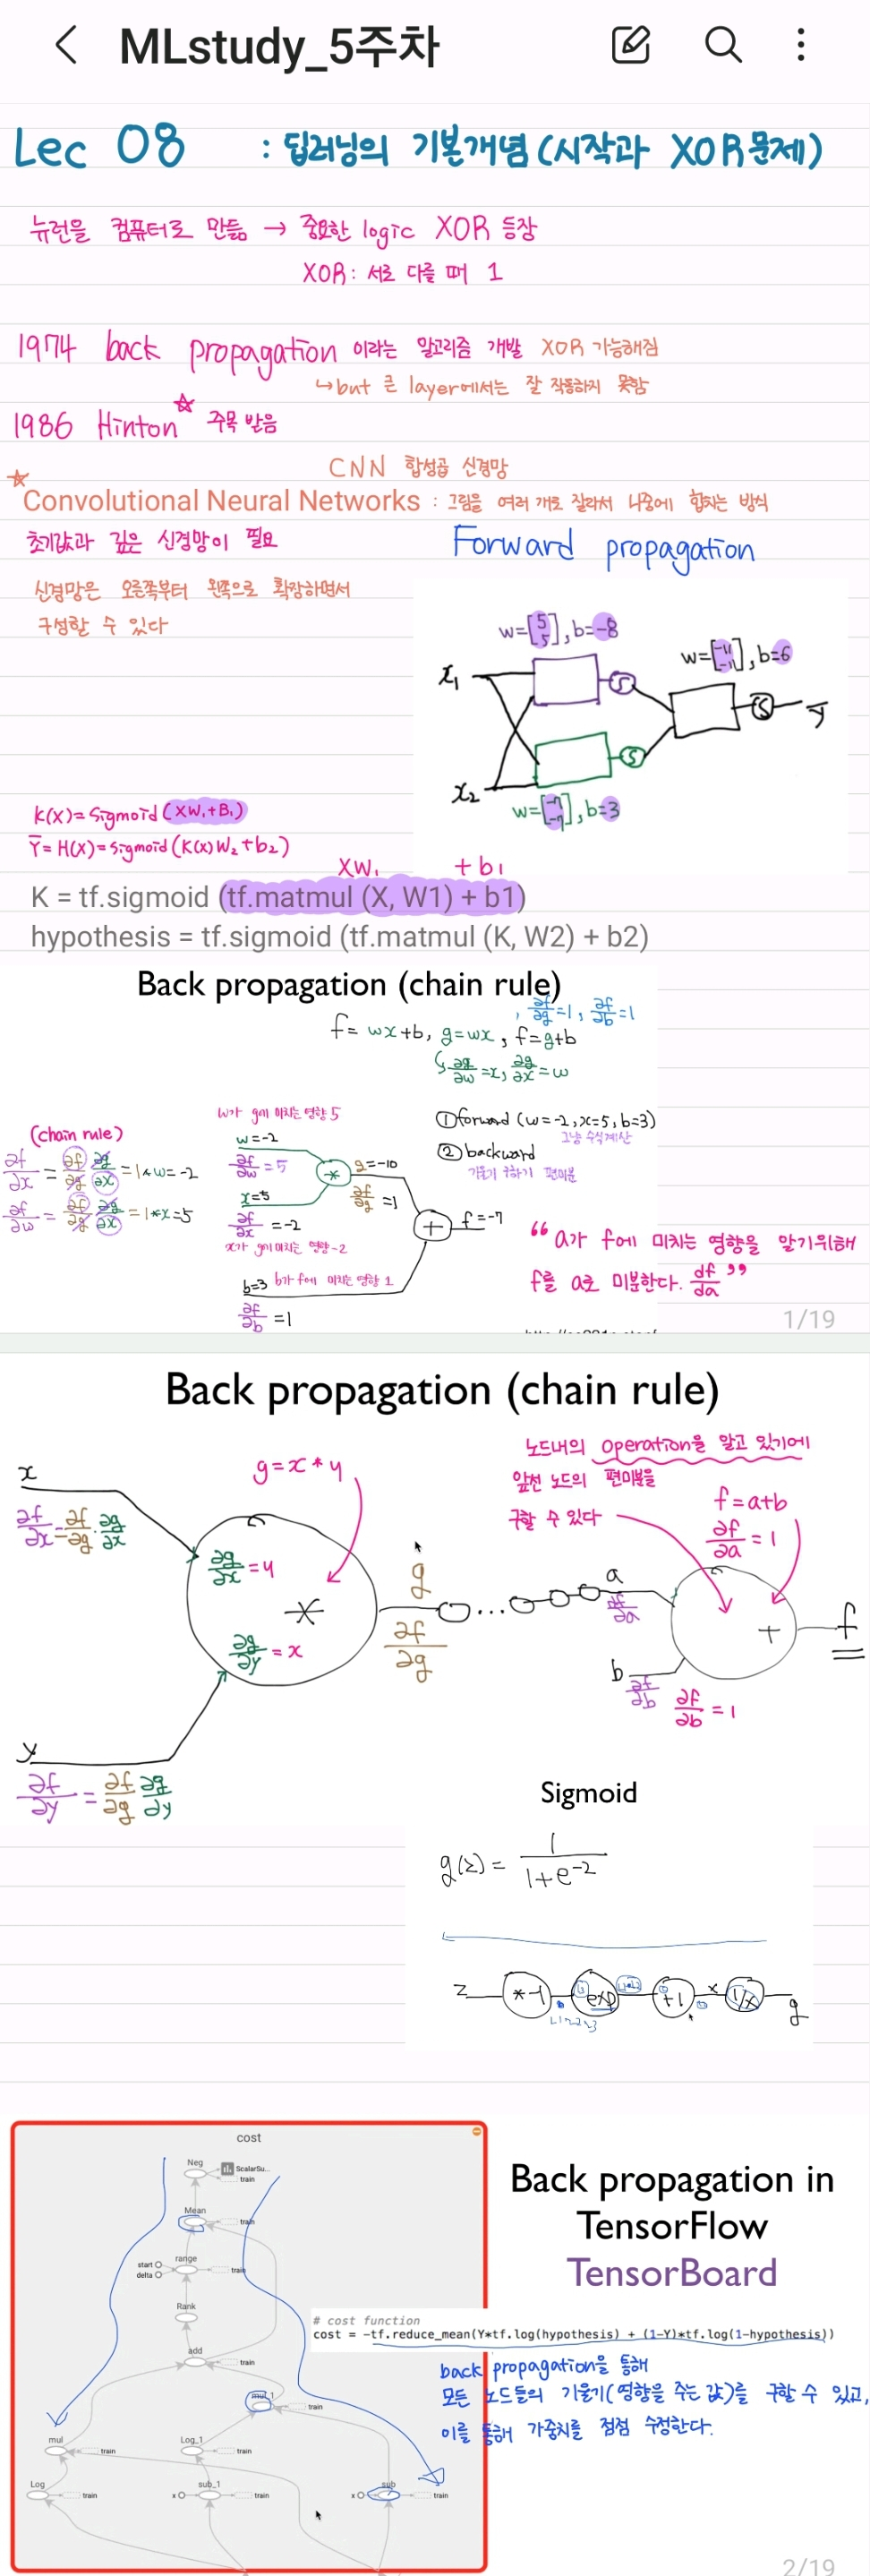

# Lab 09-1 Neural Nets for XOR

XOR 문제를 Logistic Regression을 풀어본 코드 --> XOR은 Logistic 즉 0,1을 나누는 직선의 그래프로 아래의 네모와 세모를 나눌 수 없다. 즉, Logistic Regression으로 XOR을 풀 수 없다.

따라서 아래의 코드의 결과는 정확도 50%로 수렴하게 된다.

해결방법은 3개의 Logistic Regression을 사용하여 XOR문제를 푸는 것이다.

Input X --> Linear function --> Logistic fuction --> Decision Boundary Y(0,1)의 과정이 하나의 Neural Net이다. (뉴런 한개)

2단의 layer, 3개의 logistic regression으로 기본 구성되어 있고 하위 2개의 Logistic은 하나로 합칠 수 있다. 이러한 Neural Net이 모여서 복잡한 인공 신경망들을 만들어 낸다.

In [1]:
# Logistic regression으로 xor해보는 코드
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility

print(tf.__version__)

2.0.0


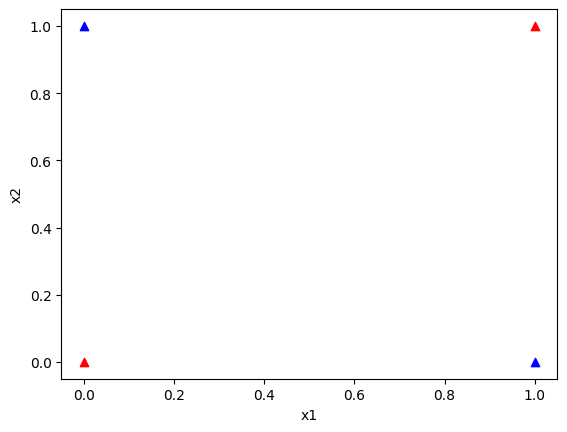

In [3]:
# XOR로 구분할 data를 2차원 공간에 표현
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [4]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
# tensorflow data API를 통해 학습시킬 값을 담는다.
# type을 float32로 맞추는 작업
def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [5]:
# weight 와 bias 선언
W = tf.Variable(tf.zeros((2,1)), name='weight')
b = tf.Variable(tf.zeros((1,)), name='bias')
print("W = {}, B = {}".format(W.numpy(), b.numpy()))

W = [[0.]
 [0.]], B = [0.]


In [6]:
# sigmoid함수를 가설함수로 정의
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

In [7]:
# cost함수 정의
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [8]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [9]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [10]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
print("W = {}, B = {}".format(W.numpy(), b.numpy()))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.6931
Iter: 200, Loss: 0.6931
Iter: 300, Loss: 0.6931
Iter: 400, Loss: 0.6931
Iter: 500, Loss: 0.6931
Iter: 600, Loss: 0.6931
Iter: 700, Loss: 0.6931
Iter: 800, Loss: 0.6931
Iter: 900, Loss: 0.6931
Iter: 1000, Loss: 0.6931
W = [[0.]
 [0.]], B = [0.]
Testset Accuracy: 0.5000


## Lab 09-2 Nueral network로 XOR 문제 풀기

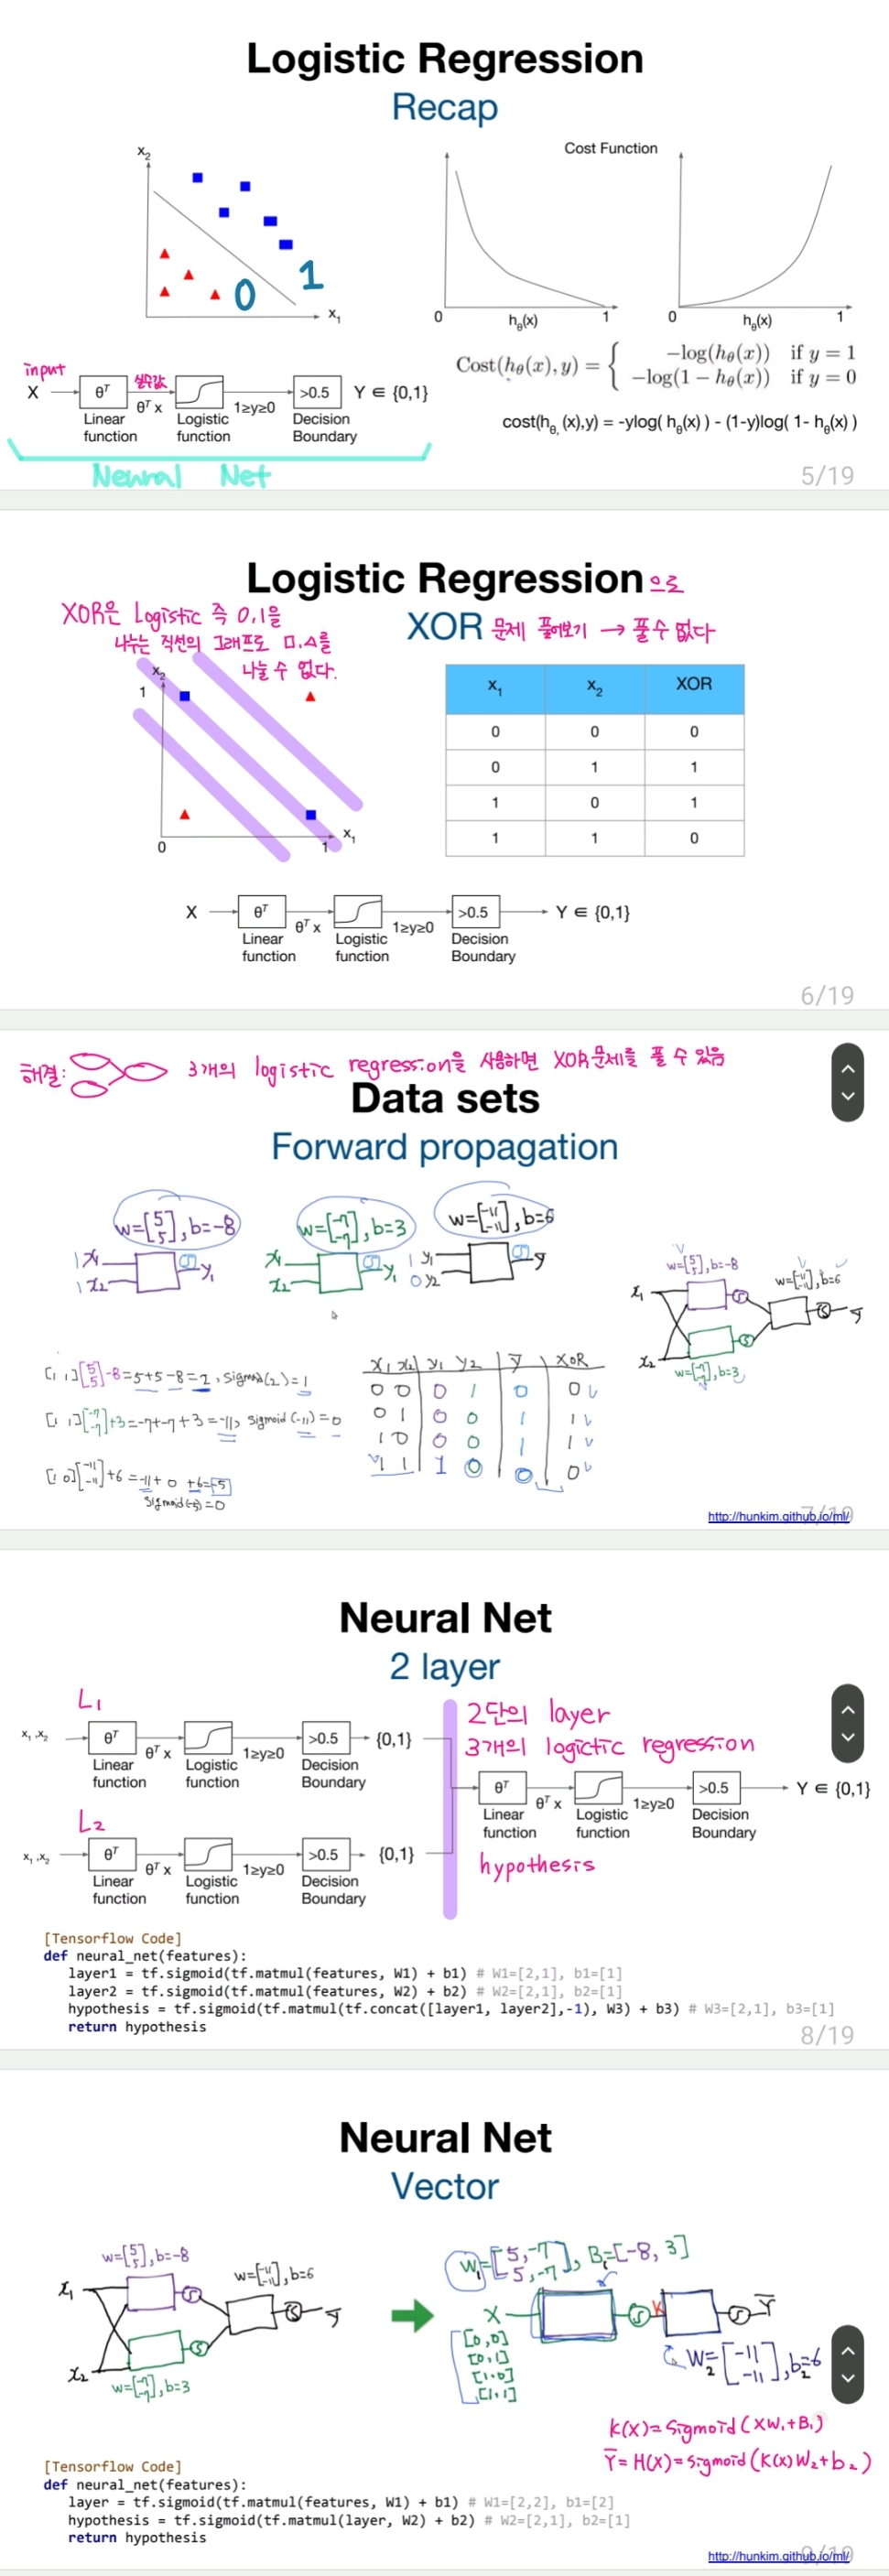

In [18]:
# 뉴럴 네트워크를 만들기 위한 기본 라이브러리
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777) # random seed값 선언

print(tf.__version__)

2.0.0


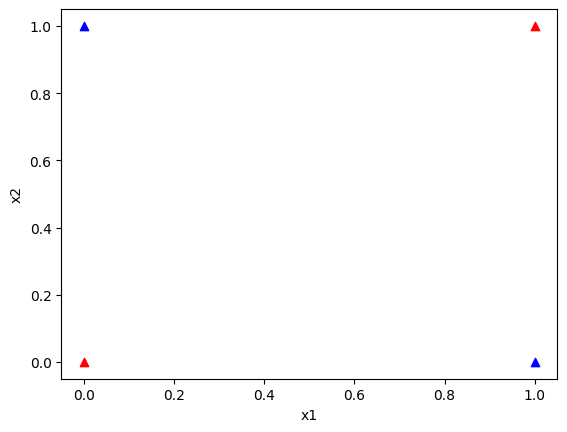

In [13]:
# data는 위에 코드와 동일
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [14]:
# dataset 구성
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
# 데이터 전처리 계산을 위해 int를 float으로 바꿔줌
def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [15]:
# 실제 모델에 학습기킬 w와 b값을 선언
W1 = tf.Variable(tf.random.normal((2, 1)), name='weight1')
b1 = tf.Variable(tf.random.normal((1,)), name='bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name='weight2')
b2 = tf.Variable(tf.random.normal((1,)), name='bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name='weight3')
b3 = tf.Variable(tf.random.normal((1,)), name='bias3')

In [16]:
# neural net 3개를 선언
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    # layer1 & layer2 합쳐서 layer3
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    # 가설함수 리턴받는다.
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

# gradient descent 선언
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# 0.5를 기준으로 1,0을 출력
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [17]:
# 학습시작
EPOCHS = 50000

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 5000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.8487
Iter: 5000, Loss: 0.6847
Iter: 10000, Loss: 0.6610
Iter: 15000, Loss: 0.6154
Iter: 20000, Loss: 0.5722
Iter: 25000, Loss: 0.5433
Iter: 30000, Loss: 0.5211
Iter: 35000, Loss: 0.4911
Iter: 40000, Loss: 0.4416
Iter: 45000, Loss: 0.3313
Testset Accuracy: 1.0000


In [2]:
pip install tensorboard